In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def calc_gradient(thetas, x, y):
    dick_hat = x.dot(thetas) 
    error = y - dick_hat # do we really need to flatten it as it's 1-d already? 
    gradient = -(1.0/len(x)) * error.dot(x) # ith column in x  contains ith features across every example
    
    mse = np.mean(error**2) # this calculates the mean squared error
    #mse = np.mean(error**2)/2 # this calculates half of the mean squared error as in the lecture slides
    
    return gradient, mse # a function can return two values

In [26]:
diabetes = load_diabetes()

X = diabetes.data[:,2]

y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

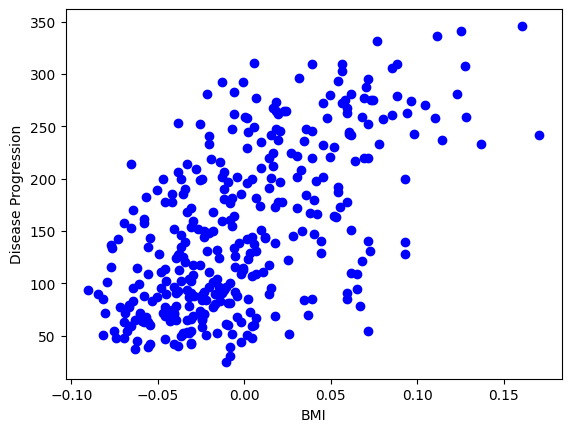

In [27]:
##plot the training data points

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')

plt.show()


In [28]:
##reshape the data to be 2D
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [29]:


# thetas = [0, 0] # start at this set of thetas
thetas = [0, 0] # start at this set of thetas
iter_count = 0
lr = 0.0001 # learning rate - it's a tiny value/step
tolerance = 0.0001 # accepted for convergence
#tolerance = 0.01 # changed to much higher tolerance


print(X_train)
print(y_train)

print(X_train.shape)
print(y_train.shape)



while True:

	gradient, mse = calc_gradient(thetas, X_train, y_train) 
	thetas_hat = thetas - lr * gradient # this calculates the new thetas
	
	# this is similar to stochastic gradient descent (i.e. converge when thetas ocsillate)
	# when changes to thetas are very small, mse is close to the min
	# remember that the cost function is 1/2*mse
	# 
	if np.sum(abs(thetas_hat - thetas)) < tolerance: 
		print("CONVERGED!!!!!!")
		break
		
	thetas = thetas_hat
	
	if iter_count % 1 == 0:
		print("Iteration: %i - mse: %.3f" % (iter_count, mse)) # note that the cost function is half of mse
		
		# You can uncomment either of thetas and gradient to see what it looks like in each iteration
		#print("Theta:")
		#print(thetas)
		#print("gradient:")
		#print(gradient)
	
	iter_count += 1

[[ 0.00241654]
 [-0.07734155]
 [-0.03530688]
 [ 0.00133873]
 [ 0.02073935]
 [-0.03638469]
 [-0.04069594]
 [ 0.03259528]
 [ 0.114509  ]
 [ 0.02828403]
 [ 0.06169621]
 [-0.01267283]
 [-0.04069594]
 [-0.00943939]
 [-0.05794093]
 [ 0.05307371]
 [-0.00189471]
 [ 0.05415152]
 [ 0.13714305]
 [-0.00405033]
 [-0.02991782]
 [ 0.01966154]
 [-0.05686312]
 [-0.05578531]
 [-0.0902753 ]
 [-0.02560657]
 [ 0.07355214]
 [ 0.07462995]
 [-0.03854032]
 [ 0.12313149]
 [-0.04392938]
 [-0.03099563]
 [-0.02560657]
 [-0.04931844]
 [ 0.05630715]
 [-0.05578531]
 [-0.02237314]
 [ 0.01427248]
 [ 0.03798434]
 [ 0.06708527]
 [ 0.00672779]
 [ 0.0164281 ]
 [-0.00728377]
 [ 0.00888341]
 [ 0.00026092]
 [-0.06656343]
 [ 0.05954058]
 [ 0.05630715]
 [-0.02452876]
 [-0.07626374]
 [-0.03638469]
 [-0.0374625 ]
 [ 0.08540807]
 [ 0.00241654]
 [ 0.01535029]
 [-0.05686312]
 [-0.04824063]
 [-0.06440781]
 [-0.03530688]
 [ 0.00672779]
 [-0.00836158]
 [ 0.00457217]
 [-0.0105172 ]
 [ 0.12852056]
 [ 0.0703187 ]
 [ 0.06169621]
 [-0.04608

ValueError: shapes (353,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)